<a href="https://colab.research.google.com/github/vrunstar/pandas/blob/main/notebooks/netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as cnt

In [8]:
netflix = "https://raw.githubusercontent.com/vrunstar/pandas/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(netflix)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
print(f"{df.shape}\n")
print(f"{df.isnull().sum()}\n")
print(f"{df.describe(include = 'all')}\n")


(8807, 12)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            N

In [23]:
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['country'] = df['country'].fillna('Unknown')

In [29]:
print(f"{df['type'].value_counts()}\n")
print(f"{df['country'].value_counts().head(10)}\n")
print(f"{df['release_year'].value_counts().head(10)}\n")

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

country
United States     2818
India              972
Unkonwn            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64



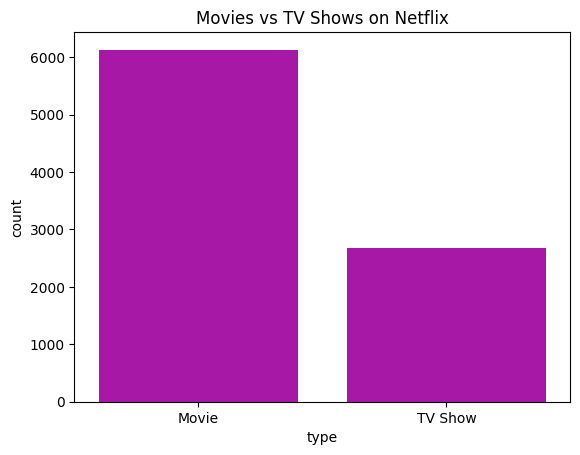

In [32]:
sns.countplot(x='type', data=df, color='m')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

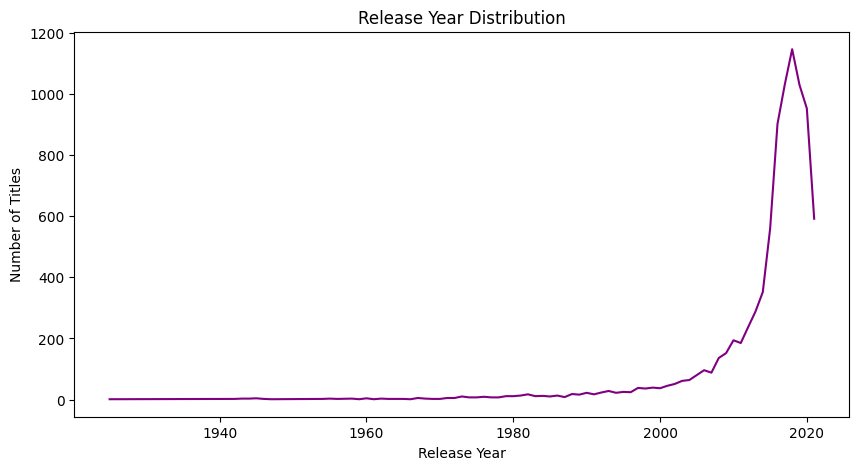

In [34]:
plt.figure(figsize=(10, 5))
df['release_year'].value_counts().sort_index().plot(kind='line', color="purple")
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

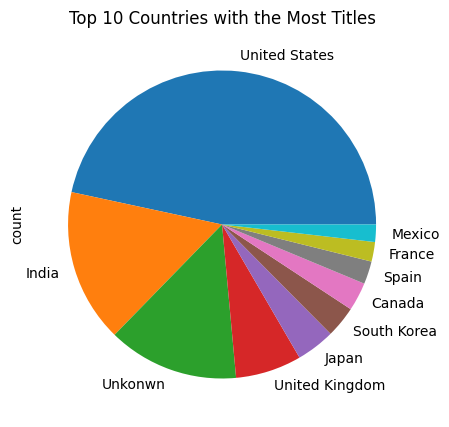

In [40]:
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='pie', color="green")
plt.title("Top 10 Countries with the Most Titles")
plt.show()

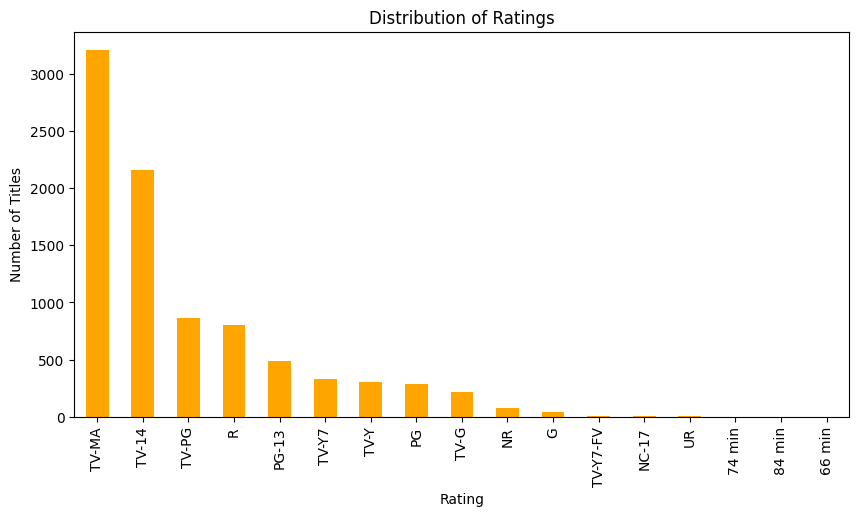

In [41]:
plt.figure(figsize=(10, 5))
df['rating'].value_counts().plot(kind='bar', color="orange")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()

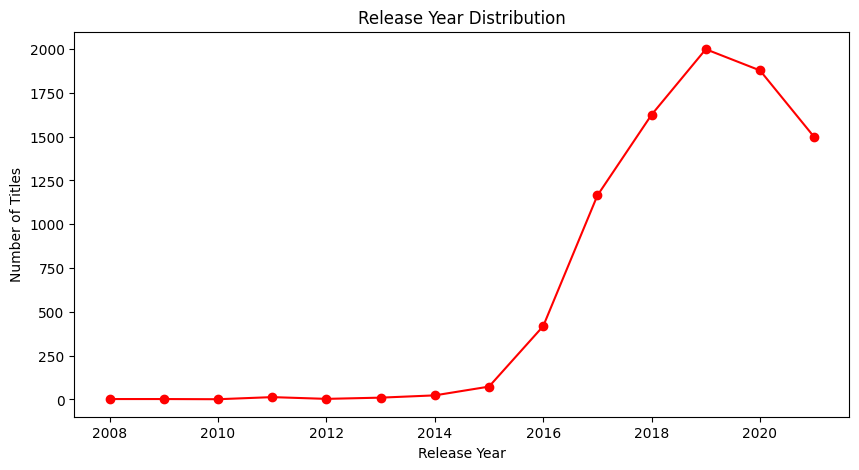

In [48]:
plt.figure(figsize=(10, 5))
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', color="red", marker='o')
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()